# IRIS FLOWER CLASSIFICATION
### Project by MEGHA MITTAL

### Importing necessary libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

### Importing models and evaluation metric



In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Loading the dataset

In [107]:
data= pd.read_csv('data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### We have 6 columns in our dataset 


In [109]:
unique_species = data['Species'].unique()
unique_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### We have 3 different types of species , which are 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'.

In [110]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### each of the species is well balanced, we have 50 species of each type.

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [112]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### No null values

In [114]:
duplicated_values = data.duplicated()
print(duplicated_values)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [115]:
data[data.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


#### No duplicate values

# Exploratory Data Analysis

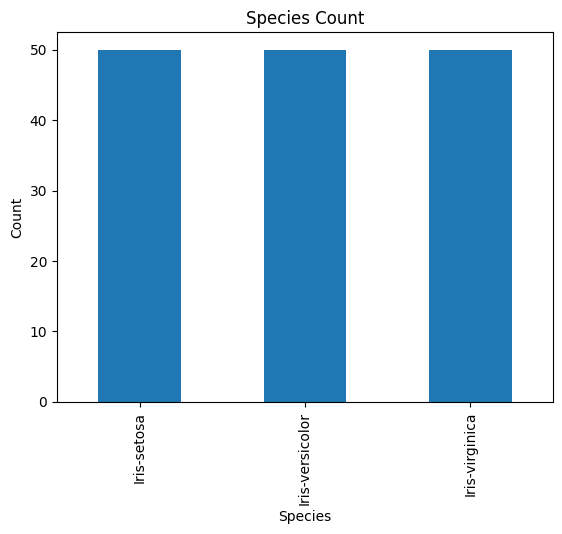

In [116]:
data['Species'].value_counts().plot(kind='bar')
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

#### Bar graph for value count of each species

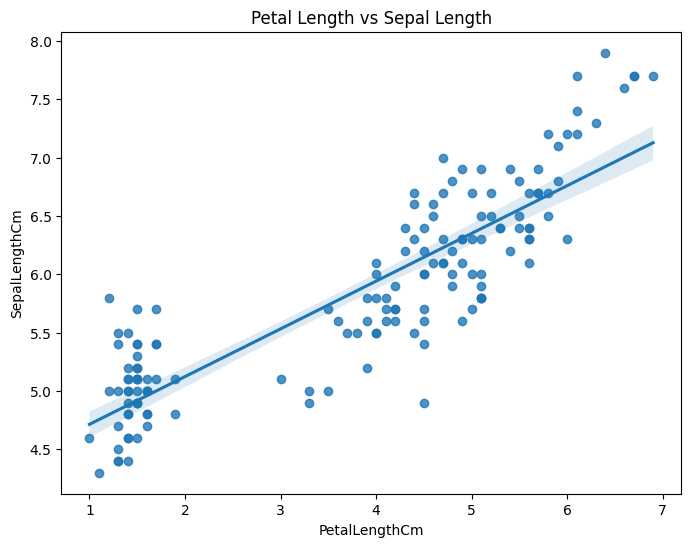

In [117]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalLengthCm',y='SepalLengthCm',data=data)
plt.title('Petal Length vs Sepal Length')
plt.show()

#### Plotting Petal Length vs Sepal Length with a regression line


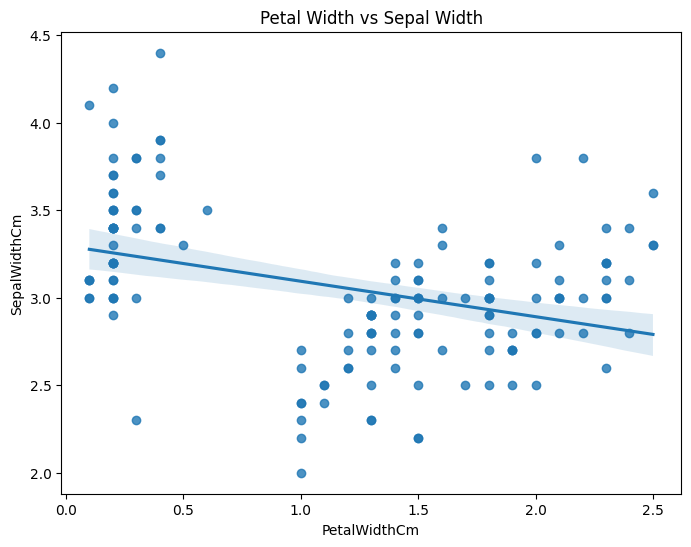

In [118]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalWidthCm',y='SepalWidthCm',data=data)
plt.title('Petal Width vs Sepal Width')
plt.show()

####  Plotting Petal Width vs Sepal Width with a regression line


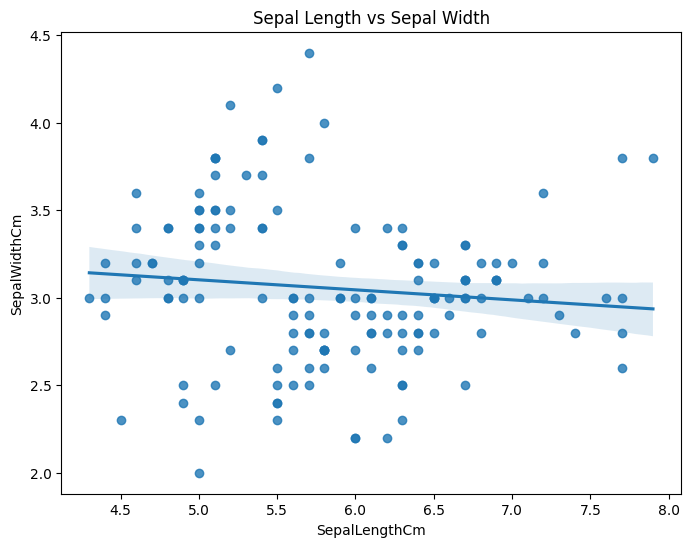

In [119]:
plt.figure(figsize=(8,6))
sns.regplot(x='SepalLengthCm',y='SepalWidthCm',data=data)
plt.title('Sepal Length vs Sepal Width')
plt.show()

#### Plotting Sepal Length vs Sepal Width with a regression line


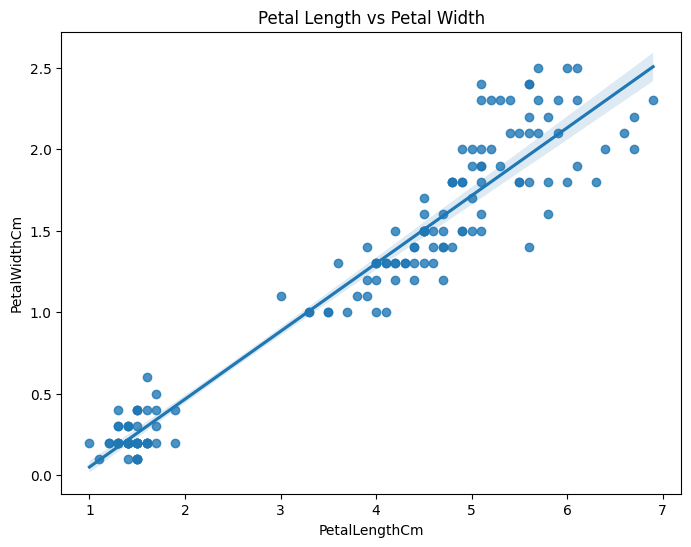

In [120]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalLengthCm',y='PetalWidthCm',data=data)
plt.title('Petal Length vs Petal Width')
plt.show()

#### Plotting Petal Length vs Petal Width with a regression line


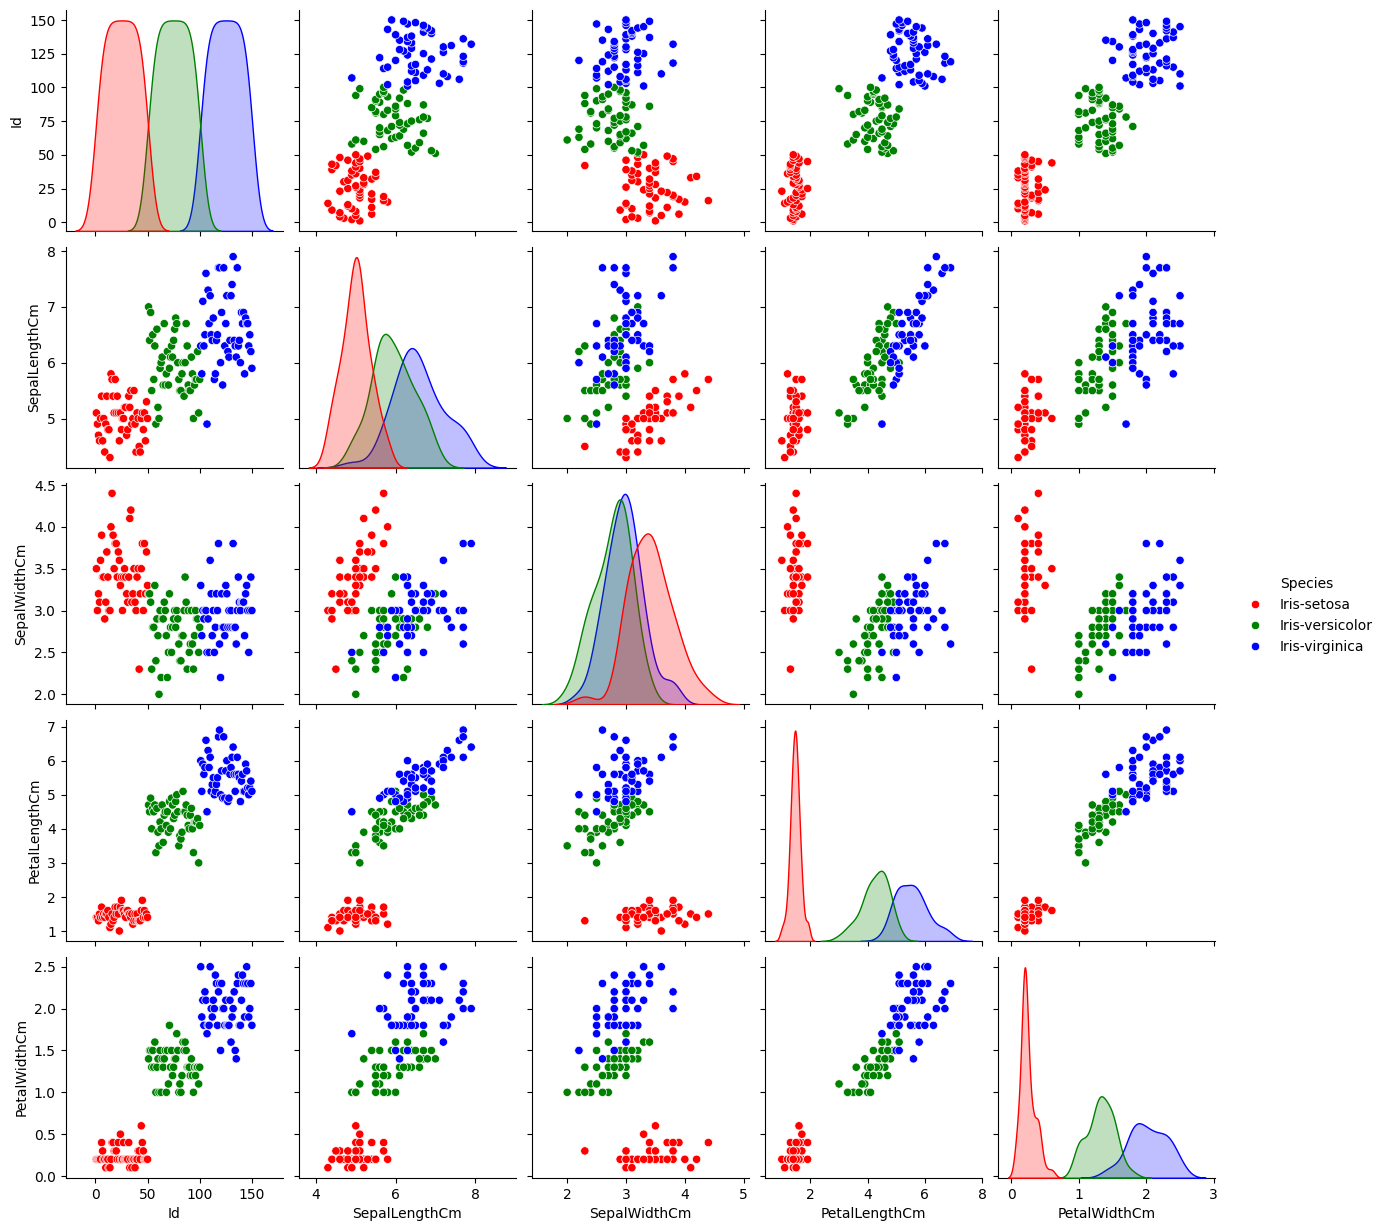

In [121]:
from seaborn import color_palette

custom_palette = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

sns.pairplot(data=data, hue='Species', palette=custom_palette)
plt.show()

#### Pairplot


<Axes: >

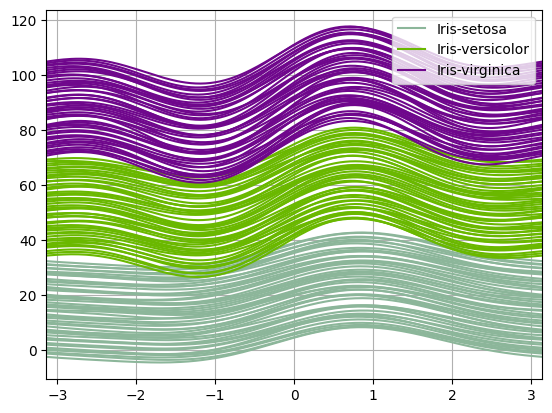

In [122]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(data, "Species")

#### Andrews curves

In [123]:
x = data.iloc[:, 1:5].values  # Skipping the first column which is 'Id'
y = data.iloc[:, 5].values

#### Seperating the independent variable and target variable

In [124]:
data=data.drop(['Id'],axis=1)

#### id columnn is not necessary

In [125]:
X=data.drop('Species',axis=1)
y=data['Species']

# NEURAL NETWORK


In [126]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [127]:
data['Species'] = pd.Categorical(data.Species)
data['Species'] = data.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(data.Species)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=20)

In [129]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [130]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [131]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))


Epoch 1/45
4/4 [==============================] - 0s 25ms/step - loss: 1.0055 - accuracy: 0.2000 - val_loss: 0.9540 - val_accuracy: 0.4222
Epoch 2/45
4/4 [==============================] - 0s 5ms/step - loss: 0.9397 - accuracy: 0.5810 - val_loss: 0.8967 - val_accuracy: 0.6667
Epoch 3/45
4/4 [==============================] - 0s 5ms/step - loss: 0.8869 - accuracy: 0.6667 - val_loss: 0.8469 - val_accuracy: 0.6889
Epoch 4/45
4/4 [==============================] - 0s 5ms/step - loss: 0.8373 - accuracy: 0.6667 - val_loss: 0.8041 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 6ms/step - loss: 0.7991 - accuracy: 0.6667 - val_loss: 0.7682 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 5ms/step - loss: 0.7627 - accuracy: 0.6667 - val_loss: 0.7327 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 17ms/step - loss: 0.7286 - accuracy: 0.6762 - val_loss: 0.6999 - val_accuracy: 0.8889
Epoch 8/45
4/4 [================

In [132]:
model.evaluate(X_test,y_test)


2/2 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.9778


[0.3053648769855499, 0.9777777791023254]

In [133]:
pred = model.predict(X_test[:10])
print(pred)


1/1 [==============================] - 0s 21ms/step
[[1.03422776e-01 6.38010144e-01 2.58567035e-01]
 [7.40627293e-03 3.20953965e-01 6.71639740e-01]
 [9.55382824e-01 4.25705947e-02 2.04661372e-03]
 [5.59413731e-02 6.98926151e-01 2.45132521e-01]
 [2.75838375e-03 2.14982554e-01 7.82259047e-01]
 [3.05043045e-03 2.39790693e-01 7.57158816e-01]
 [9.63625789e-01 3.48814800e-02 1.49280659e-03]
 [9.81832385e-01 1.76731665e-02 4.94433916e-04]
 [9.53119099e-01 4.47678901e-02 2.11305590e-03]
 [6.30790787e-03 2.66846538e-01 7.26845622e-01]]


In [134]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[1 2 0 1 2 2 0 0 0 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [135]:
history.history['accuracy']

[0.20000000298023224,
 0.5809524059295654,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6761904954910278,
 0.7809523940086365,
 0.8285714387893677,
 0.8857142925262451,
 0.8285714387893677,
 0.8190476298332214,
 0.8476190567016602,
 0.8476190567016602,
 0.8761904835700989,
 0.8571428656578064,
 0.8571428656578064,
 0.8476190567016602,
 0.8285714387893677,
 0.8476190567016602,
 0.8952381014823914,
 0.8952381014823914,
 0.8952381014823914,
 0.8761904835700989,
 0.8952381014823914,
 0.8857142925262451,
 0.8761904835700989,
 0.9047619104385376,
 0.9333333373069763,
 0.9428571462631226,
 0.9428571462631226,
 0.9428571462631226,
 0.9428571462631226,
 0.9428571462631226,
 0.9428571462631226,
 0.9523809552192688,
 0.961904764175415,
 0.9428571462631226,
 0.9428571462631226,
 0.9523809552192688,
 0.961904764175415,
 0.9809523820877075,
 0.9714285731315613,
 0.961904764175415,
 0.9523809552192688]

In [136]:
history.history['val_accuracy']


[0.42222222685813904,
 0.6666666865348816,
 0.6888889074325562,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.8888888955116272,
 0.9111111164093018,
 0.8666666746139526,
 0.9111111164093018,
 0.8666666746139526,
 0.8888888955116272,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.8666666746139526,
 0.8666666746139526,
 0.9333333373069763,
 0.9777777791023254,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.9777777791023254,
 0.9111111164093018,
 0.9333333373069763,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254]

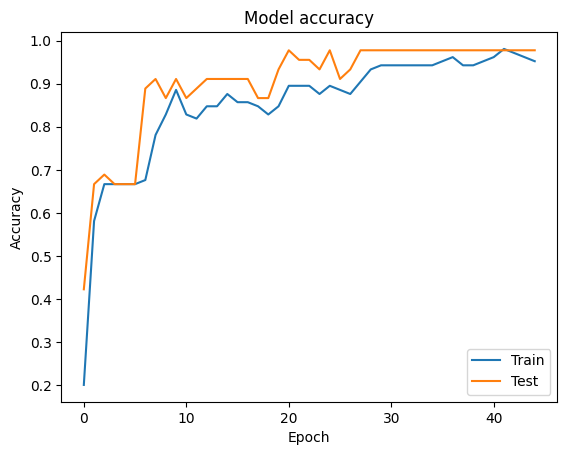

In [137]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Results


### The neural network model performed well, achieving a high accuracy of 97.77% on the test set.
### The loss steadily decreased during training, and the model generalizes well on unseen data, as indicated by the validation accuracy.
### The predictions made by the model matched the actual species labels closely, demonstrating the effectiveness of the neural network for this classification task.
